# Machine Learning project

In [1]:
import pandas as pd #for data set manipulation
import numpy as np #for mathematical calculations
import matplotlib.pyplot as plt #for graphs , charts to unerstand data 
%matplotlib inline

# reading data

In [2]:
data=pd.read_csv('Obesity based on eating habits & physical cond\ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# preprocessing

In [3]:
data.info()    #to see if there is missing data in the data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
#then, there is no missing values in the data set 

In [5]:
#another way to check MV
print(data.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [6]:
data.isnull()          #if thereis no missing value, then it returns false

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#for checking if there is categorical data
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
print( data['Gender'].unique())
print(data['family_history_with_overweight'].unique())
print (data['FAVC'].unique())
print(data['CAEC'].unique())
print(data['SMOKE'].unique())
print(data['SCC'].unique())
print(data['CALC'].unique())
print(data['MTRANS'].unique())
print(data['NObeyesdad'].unique())
  #to show unique values of features of data type object

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [9]:
data_encoded=data.replace({
        'Gender':{'Male':1,'Female':0},
        'family_history_with_overweight':{'no':0,'yes':1},
        'FAVC':{'no':0,'yes':1},
        'CAEC':{'Sometimes':0,'Frequently':1,'Always':2,'no':3},
        'SMOKE':{'no':0,'yes':1},
        'SCC':{'no':0,'yes':1},
        'CALC':{'Sometimes':0,'Frequently':1,'Always':2,'no':3},
        'MTRANS':{'Public_Transportation':0, 'Walking':1, 'Automobile':2, 'Motorbike':3,'Bike':4},
        'NObeyesdad':{'Normal_Weight':0, 'Overweight_Level_I':1, 'Overweight_Level_II':2,
                    'Obesity_Type_I':3, 'Insufficient_Weight':4, 'Obesity_Type_II':5,'Obesity_Type_III':6 }           
})

data_encoded

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,0,2.000000,0,0.000000,1.000000,3,0,0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,0,1,3.000000,1,3.000000,0.000000,0,0,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,0,2.000000,1.000000,1,0,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,1,1,1
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,0,1.728139,0,1.676269,0.906247,0,0,6
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,0,2.005130,0,1.341390,0.599270,0,0,6
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,0,2.054193,0,1.414209,0.646288,0,0,6
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,0,2.852339,0,1.139107,0.586035,0,0,6


In [10]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
gender_labels = gle.fit_transform(data['Gender'])
gender_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [11]:
gle = LabelEncoder()
family_labels = gle.fit_transform(data['family_history_with_overweight'])
family_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
family_mappings

{0: 'no', 1: 'yes'}

In [12]:
gle = LabelEncoder()
FAVC_labels = gle.fit_transform(data['FAVC'])
FAVC_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
FAVC_mappings

{0: 'no', 1: 'yes'}

In [13]:
gle = LabelEncoder()
CAEC_labels = gle.fit_transform(data['CAEC'])
CAEC_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
CAEC_mappings

{0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}

In [14]:
gle = LabelEncoder()
SMOKE_labels = gle.fit_transform(data['SMOKE'])
SMOKE_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
SMOKE_mappings

{0: 'no', 1: 'yes'}

In [15]:
gle = LabelEncoder()
SCC_labels = gle.fit_transform(data['SCC'])
SCC_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
SCC_mappings

{0: 'no', 1: 'yes'}

In [16]:
gle = LabelEncoder()
CALC_labels = gle.fit_transform(data['CALC'])
CALC_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
CALC_mappings

{0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}

In [17]:
gle = LabelEncoder()
MTRANS_labels = gle.fit_transform(data['MTRANS'])
MTRANS_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
MTRANS_mappings

{0: 'Automobile',
 1: 'Bike',
 2: 'Motorbike',
 3: 'Public_Transportation',
 4: 'Walking'}

In [18]:
gle = LabelEncoder()
NObeyesdad_labels = gle.fit_transform(data['NObeyesdad'])
NObeyesdad_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
NObeyesdad_mappings

{0: 'Insufficient_Weight',
 1: 'Normal_Weight',
 2: 'Obesity_Type_I',
 3: 'Obesity_Type_II',
 4: 'Obesity_Type_III',
 5: 'Overweight_Level_I',
 6: 'Overweight_Level_II'}

In [19]:
#then caterical data is encoded successfully 
#preprocessing is done

# Splitting dataset into input and output

In [20]:
X = data_encoded.drop(columns=['NObeyesdad'])
y = data_encoded['NObeyesdad']

# Splitting dataset into train, validation, and test

In [21]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X , y , test_size=0.20, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1350, 16)
y_train: (1350,)
------------------------
X_val: (338, 16)
y_val: (338,)
------------------------
X_test: (423, 16)
y_test: (423,)


In [22]:
y_train.value_counts()

3    224
6    211
0    194
5    190
2    184
1    181
4    166
Name: NObeyesdad, dtype: int64

In [23]:
#Data balancing
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
y_train_rus.value_counts()


0    166
1    166
2    166
3    166
4    166
5    166
6    166
Name: NObeyesdad, dtype: int64

In [24]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
y_train_balanced.value_counts()

3    224
0    224
4    224
6    224
2    224
5    224
1    224
Name: NObeyesdad, dtype: int64

# Random Forest Algorithm = ensamble learning

In [25]:
from sklearn.metrics import accuracy_score

def eval_model(model, X_train_balanced, y_train_balanced, X_val, y_val):
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_train = model.predict(X_train_balanced)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train_balanced, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val

In [26]:
# Random Forest (RF)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0) #take object #n_estimators=num of DT
eval_model(rf, X_train_balanced, y_train_balanced, X_val, y_val)

(0.7589285714285714, 0.7130177514792899)

In [27]:
#optimize n_estimators
import numpy as np

n_estimators_values = [100, 200, 300, 400, 500]
acc_train_values = []
acc_val_values = []

for n_estimators in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=3, random_state=0)
    acc_train, acc_val = eval_model(model, X_train_balanced, y_train_balanced, X_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results = pd.DataFrame({
    'n_estimators': n_estimators_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results

,n_estimators,acc_train,acc_val
0,100,0.758929,0.713018
1,200,0.755102,0.707101
2,300,0.750638,0.695266
3,400,0.746811,0.689349
4,500,0.741071,0.692308


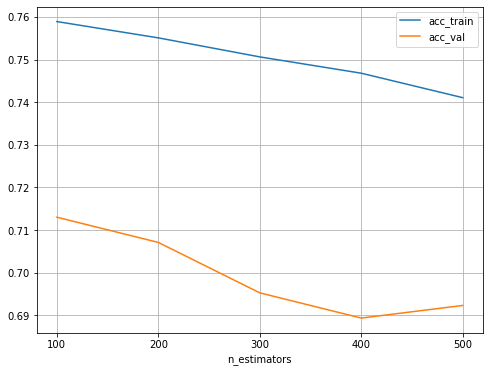

In [28]:
results.plot(x='n_estimators', y=['acc_train', 'acc_val'], figsize=(8, 6))
plt.grid(axis='both')
plt.xticks(n_estimators_values)
plt.show()

In [29]:
#optimize max_depth   #n_estimators=500
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
acc_train_values = []
acc_val_values = []

for max_depth in max_depth_values:
    model = RandomForestClassifier(n_estimators=500, max_depth=max_depth, random_state=0)
    acc_train, acc_val = eval_model(model, X_train, y_train, X_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results = pd.DataFrame({
    'max_depth': max_depth_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results

,max_depth,acc_train,acc_val
0,1,0.473333,0.449704
1,2,0.626667,0.612426
2,3,0.765185,0.707101
3,4,0.874074,0.819527
4,5,0.920741,0.875740
5,6,0.957778,0.905325
6,7,0.981481,0.926036
7,8,0.994074,0.946746
8,9,1.000000,0.946746


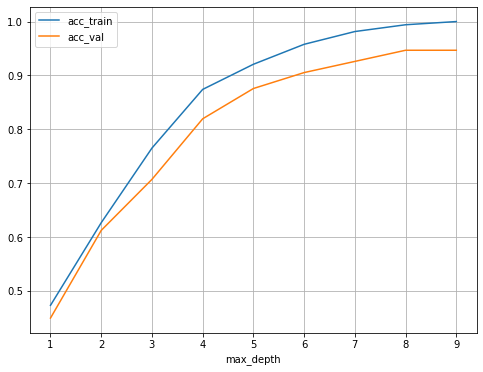

In [30]:
results.plot(x='max_depth', y=['acc_train', 'acc_val'], figsize=(8, 6))
plt.grid(axis='both')
plt.xticks(max_depth_values)
plt.show()

In [31]:
best_model = RandomForestClassifier(n_estimators=500, max_depth=4, random_state=0)
eval_model(best_model, X_train_balanced, y_train_balanced, X_test, y_test)

(0.8647959183673469, 0.817966903073286)

# Grid Search CV


In [32]:
#Grid Search CV
search_space = {
    "n_estimators" : [100, 200, 300, 400, 500],
    "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9]
}
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 0)
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(estimator = xgb_model,      
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

In [33]:
GS.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=1, n_estimators=100; neg_root_mean_squared_error: (test=-0.881) r2: (test=0.799) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=100; neg_root_mean_squared_error: (test=-0.929) r2: (test=0.784) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=100; neg_root_mean_squared_error: (test=-0.916) r2: (test=0.802) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=100; neg_root_mean_squared_error: (test=-0.955) r2: (test=0.779) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=100; neg_root_mean_squared_error: (test=-0.887) r2: (test=0.786) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=200; neg_root_mean_squared_error: (test=-0.850) r2: (test=0.813) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=200; neg_root_mean_squared_error: (test=-0.912) r2: (test=0.792) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=200; neg_root_mean_squared_error: (tes

[CV 3/5] END max_depth=3, n_estimators=400; neg_root_mean_squared_error: (test=-0.459) r2: (test=0.950) total time=   0.3s
[CV 4/5] END max_depth=3, n_estimators=400; neg_root_mean_squared_error: (test=-0.459) r2: (test=0.949) total time=   0.3s
[CV 5/5] END max_depth=3, n_estimators=400; neg_root_mean_squared_error: (test=-0.199) r2: (test=0.989) total time=   0.3s
[CV 1/5] END max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.418) r2: (test=0.955) total time=   0.4s
[CV 2/5] END max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.418) r2: (test=0.956) total time=   0.4s
[CV 3/5] END max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.456) r2: (test=0.951) total time=   0.5s
[CV 4/5] END max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.457) r2: (test=0.949) total time=   0.5s
[CV 5/5] END max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.194) r2: (test=0.990) total time=   0.4s
[CV 1/5] END max

[CV 5/5] END max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.175) r2: (test=0.992) total time=   0.3s
[CV 1/5] END max_depth=6, n_estimators=300; neg_root_mean_squared_error: (test=-0.336) r2: (test=0.971) total time=   0.3s
[CV 2/5] END max_depth=6, n_estimators=300; neg_root_mean_squared_error: (test=-0.417) r2: (test=0.957) total time=   0.3s
[CV 3/5] END max_depth=6, n_estimators=300; neg_root_mean_squared_error: (test=-0.369) r2: (test=0.968) total time=   0.3s
[CV 4/5] END max_depth=6, n_estimators=300; neg_root_mean_squared_error: (test=-0.405) r2: (test=0.960) total time=   0.3s
[CV 5/5] END max_depth=6, n_estimators=300; neg_root_mean_squared_error: (test=-0.175) r2: (test=0.992) total time=   0.4s
[CV 1/5] END max_depth=6, n_estimators=400; neg_root_mean_squared_error: (test=-0.336) r2: (test=0.971) total time=   0.4s
[CV 2/5] END max_depth=6, n_estimators=400; neg_root_mean_squared_error: (test=-0.417) r2: (test=0.957) total time=   0.5s
[CV 3/5] END max

[CV 2/5] END max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.476) r2: (test=0.943) total time=   0.2s
[CV 3/5] END max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.400) r2: (test=0.962) total time=   0.2s
[CV 4/5] END max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.393) r2: (test=0.963) total time=   0.2s
[CV 5/5] END max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.163) r2: (test=0.993) total time=   0.2s
[CV 1/5] END max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-0.398) r2: (test=0.959) total time=   0.2s
[CV 2/5] END max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-0.476) r2: (test=0.943) total time=   0.2s
[CV 3/5] END max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-0.400) r2: (test=0.962) total time=   0.2s
[CV 4/5] END max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-0.393) r2: (test=0.963) total time=   0.2s
[CV 5/5] END max

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [34]:
print(GS.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [35]:
print(GS.best_params_)

{'max_depth': 6, 'n_estimators': 300}


In [36]:
print(GS.best_score_)

0.9694228121971626


In [37]:
best_model = RandomForestClassifier(n_estimators=500, max_depth=4, random_state=0)
eval_model(best_model, X_train_balanced, y_train_balanced, X_test, y_test)

(0.8647959183673469, 0.817966903073286)